In [76]:
# Basic Libraries for Data organization, Statistical operations and Plotting
import numpy as np
import pandas as pd
%matplotlib inline
# For loading .arff files
from scipy.io import arff
# To analyze the type of missing data
import missingno as msno
# Library for performing k-NN and MICE imputations 
import fancyimpute
# Library to perform Expectation-Maximization (EM) imputation
#import impyute as impy
# To perform mean imputation
from sklearn.impute import SimpleImputer
#To perform kFold Cross Validation
from sklearn.model_selection import KFold
# Formatted counter of class labels
from collections import Counter
# Ordered Dictionary
from collections import OrderedDict
# Library imbalanced-learn to deal with the data imbalance. To use SMOTE oversampling
from imblearn.over_sampling import SMOTE 

# Impoting classification models
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

import random

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

In [46]:
def load_arff_raw_data():
    N=5
    return [arff.loadarff('data/' + str(i+1) + 'year.arff') for i in range(N)]

In [47]:
def load_dataframes():
    return [pd.DataFrame(data_i_year[0]) for data_i_year in load_arff_raw_data()]

In [48]:
def set_new_headers(dataframes):
    cols = ['X' + str(i+1) for i in range(len(dataframes[0].columns)-1)]
    cols.append('Y')
    for df in dataframes:
        df.columns = cols

In [49]:
 
dataframes = load_dataframes()

set_new_headers(dataframes)    

dataframes[0].head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X56,X57,X58,X59,X60,X61,X62,X63,X64,Y
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,b'0'
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,b'0'
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,b'0'
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,b'0'
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,b'0'


In [50]:
def convert_columns_type_float(dfs):
    for i in range(5):
        index = 1
        while(index<=63):
            colname = dfs[i].columns[index]
            col = getattr(dfs[i], colname)
            dfs[i][colname] = col.astype(float)
            index+=1
            
convert_columns_type_float(dataframes)  

In [51]:
def convert_class_label_type_int(dfs):
    for i in range(len(dfs)):
        col = getattr(dfs[i], 'Y')
        dfs[i]['Y'] = col.astype(int)
        
convert_class_label_type_int(dataframes)

In [52]:
dataframes[0].head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X56,X57,X58,X59,X60,X61,X62,X63,X64,Y
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,0
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,0
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,0
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,0
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,0


In [53]:
def drop_nan_rows(dataframes, verbose=False):
    clean_dataframes = [df.dropna(axis=0, how='any') for df in dataframes]
    if verbose:
        for i in range(len(dataframes)):
            print(str(i+1)+'year:','Original Length=', len(dataframes[i]), '\tCleaned Length=', len(clean_dataframes[i]), '\tMissing Data=', len(dataframes[i])-len(clean_dataframes[i]))
    return clean_dataframes

nan_dropped_dataframes = drop_nan_rows(dataframes, verbose=True)

1year: Original Length= 7027 	Cleaned Length= 3194 	Missing Data= 3833
2year: Original Length= 10173 	Cleaned Length= 4088 	Missing Data= 6085
3year: Original Length= 10503 	Cleaned Length= 4885 	Missing Data= 5618
4year: Original Length= 9792 	Cleaned Length= 4769 	Missing Data= 5023
5year: Original Length= 5910 	Cleaned Length= 3031 	Missing Data= 2879


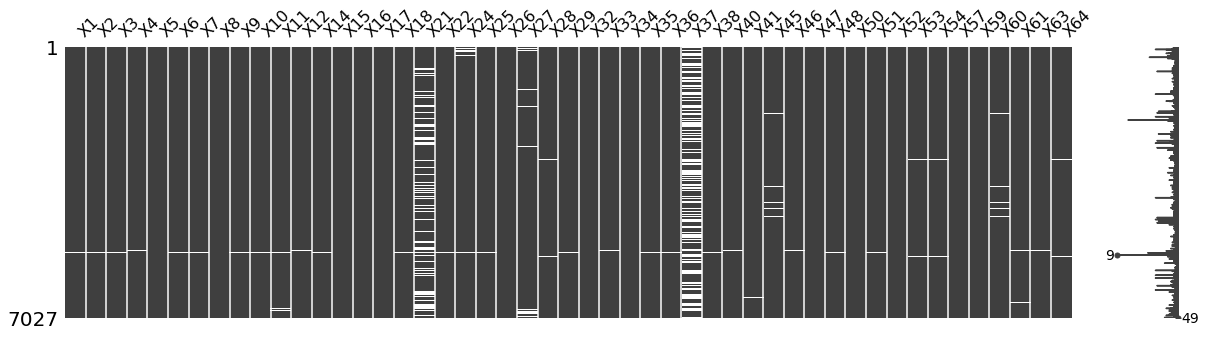

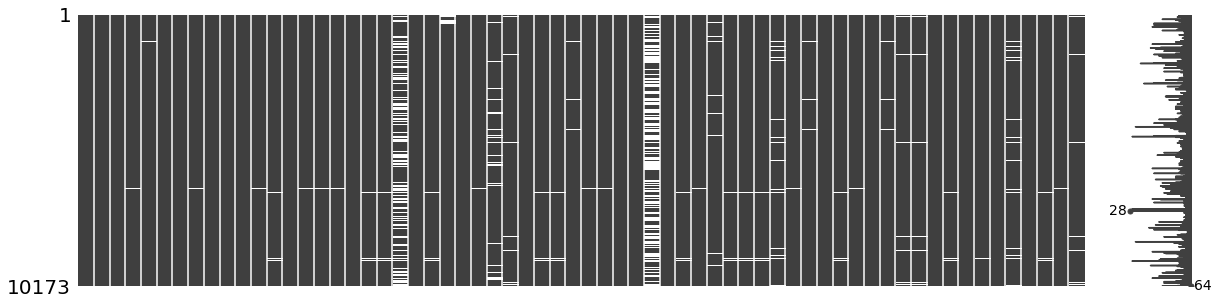

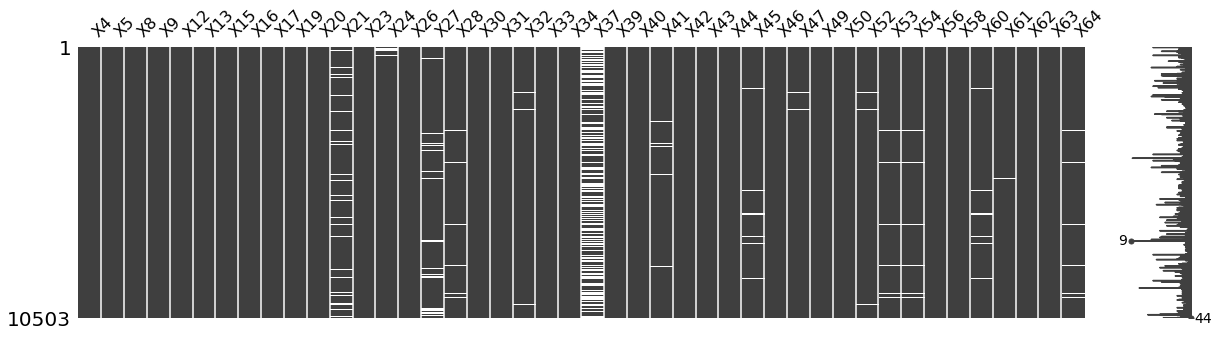

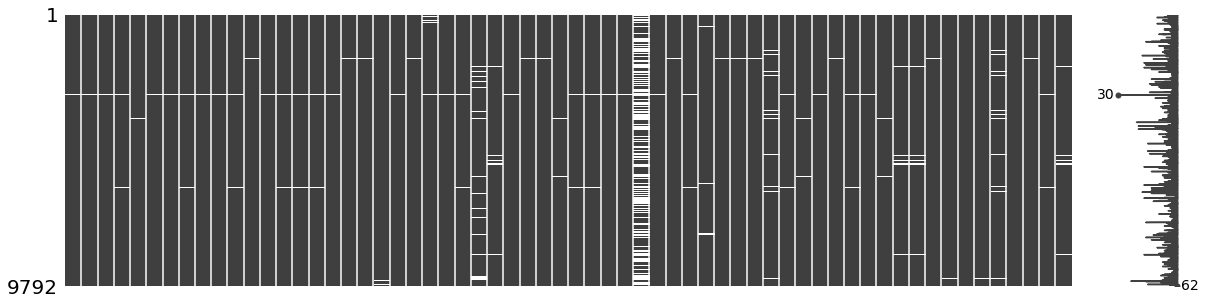

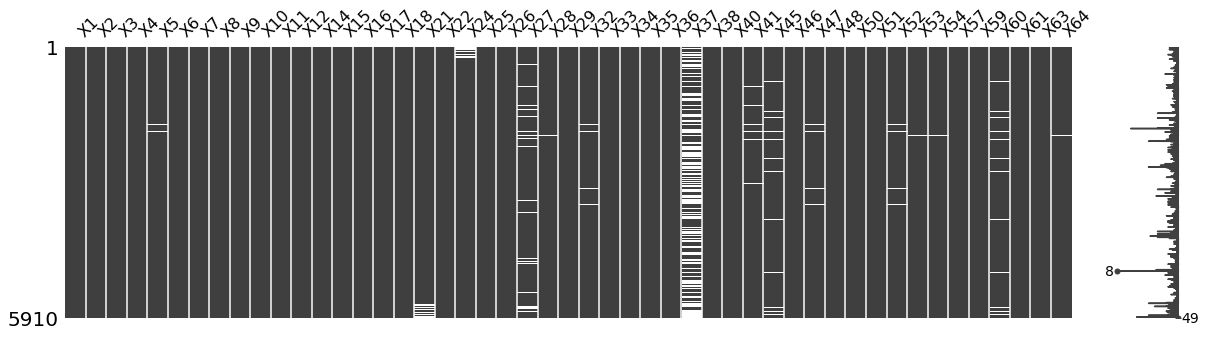

In [54]:
def generate_sparsity_matrix(dfs):
    for i in range(5):
        missing_df_i = dfs[i].columns[dfs[i].isnull().any()].tolist()
        msno.matrix(dfs[i][missing_df_i], figsize=(20,5))

generate_sparsity_matrix(dataframes)

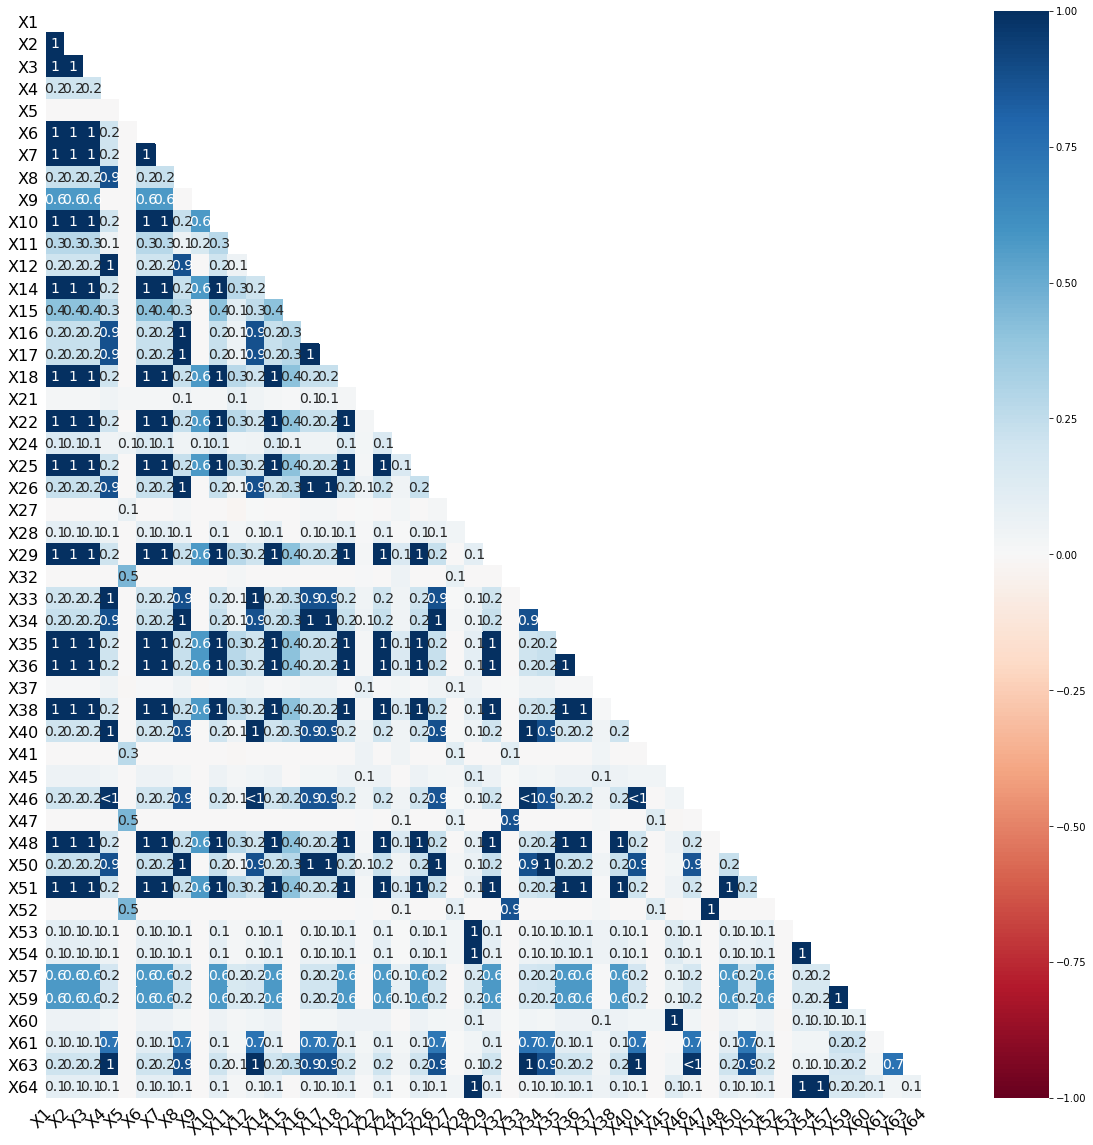

In [81]:
def generate_heatmap(dfs):
    for i in range(1):
        missing_df_i = dfs[i].columns[dfs[i].isnull().any()].tolist()
        msno.heatmap(dfs[i][missing_df_i], figsize=(20,20))
        
generate_heatmap(dataframes)     

In [56]:
def perform_mean_imputation(dfs):
    # Construct an imputer with strategy as 'mean', to mean-impute along the columns
    imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
    mean_imputed_dfs = [pd.DataFrame(imputer.fit_transform(df)) for df in dfs]
    for i in range(len(dfs)):
        mean_imputed_dfs[i].columns = dfs[i].columns   
    return mean_imputed_dfs

mean_imputed_dataframes = perform_mean_imputation(dataframes)

In [57]:
def perform_knn_imputation(dfs):
    knn_imputed_datasets = [fancyimpute.KNN(k=100,verbose=True).fit_transform(dfs[i]) for i in range(len(dfs))]
    return [pd.DataFrame(data=knn_imputed_datasets[i]) for i in range(len(dfs))]
    
knn_imputed_dataframes = perform_knn_imputation(dataframes)
set_new_headers(knn_imputed_dataframes)

Imputing row 1/7027 with 0 missing, elapsed time: 17.043
Imputing row 101/7027 with 1 missing, elapsed time: 17.053
Imputing row 201/7027 with 2 missing, elapsed time: 17.064
Imputing row 301/7027 with 0 missing, elapsed time: 17.064
Imputing row 401/7027 with 0 missing, elapsed time: 17.072
Imputing row 501/7027 with 1 missing, elapsed time: 17.072
Imputing row 601/7027 with 1 missing, elapsed time: 17.084
Imputing row 701/7027 with 1 missing, elapsed time: 17.084
Imputing row 801/7027 with 0 missing, elapsed time: 17.092
Imputing row 901/7027 with 0 missing, elapsed time: 17.092
Imputing row 1001/7027 with 1 missing, elapsed time: 17.104
Imputing row 1101/7027 with 1 missing, elapsed time: 17.104
Imputing row 1201/7027 with 3 missing, elapsed time: 17.112
Imputing row 1301/7027 with 1 missing, elapsed time: 17.112
Imputing row 1401/7027 with 1 missing, elapsed time: 17.125
Imputing row 1501/7027 with 1 missing, elapsed time: 17.131
Imputing row 1601/7027 with 1 missing, elapsed time:

Imputing row 7401/10173 with 3 missing, elapsed time: 41.682
Imputing row 7501/10173 with 0 missing, elapsed time: 41.691
Imputing row 7601/10173 with 0 missing, elapsed time: 41.697
Imputing row 7701/10173 with 1 missing, elapsed time: 41.705
Imputing row 7801/10173 with 0 missing, elapsed time: 41.712
Imputing row 7901/10173 with 1 missing, elapsed time: 41.720
Imputing row 8001/10173 with 0 missing, elapsed time: 41.731
Imputing row 8101/10173 with 0 missing, elapsed time: 41.738
Imputing row 8201/10173 with 0 missing, elapsed time: 41.738
Imputing row 8301/10173 with 1 missing, elapsed time: 41.753
Imputing row 8401/10173 with 0 missing, elapsed time: 41.769
Imputing row 8501/10173 with 3 missing, elapsed time: 41.769
Imputing row 8601/10173 with 0 missing, elapsed time: 41.785
Imputing row 8701/10173 with 0 missing, elapsed time: 41.800
Imputing row 8801/10173 with 0 missing, elapsed time: 41.800
Imputing row 8901/10173 with 2 missing, elapsed time: 41.816
Imputing row 9001/10173 

Imputing row 2901/9792 with 0 missing, elapsed time: 36.111
Imputing row 3001/9792 with 1 missing, elapsed time: 36.193
Imputing row 3101/9792 with 1 missing, elapsed time: 36.202
Imputing row 3201/9792 with 0 missing, elapsed time: 36.213
Imputing row 3301/9792 with 0 missing, elapsed time: 36.219
Imputing row 3401/9792 with 1 missing, elapsed time: 36.228
Imputing row 3501/9792 with 1 missing, elapsed time: 36.235
Imputing row 3601/9792 with 3 missing, elapsed time: 36.243
Imputing row 3701/9792 with 1 missing, elapsed time: 36.245
Imputing row 3801/9792 with 1 missing, elapsed time: 36.252
Imputing row 3901/9792 with 0 missing, elapsed time: 36.252
Imputing row 4001/9792 with 0 missing, elapsed time: 36.268
Imputing row 4101/9792 with 0 missing, elapsed time: 36.268
Imputing row 4201/9792 with 0 missing, elapsed time: 36.283
Imputing row 4301/9792 with 1 missing, elapsed time: 36.283
Imputing row 4401/9792 with 0 missing, elapsed time: 36.299
Imputing row 4501/9792 with 1 missing, e

In [58]:
def perform_MICE_imputation(dfs):
    mice_imputed_datasets = [fancyimpute.IterativeImputer(verbose=False).fit_transform(dfs[i]) for i in range(len(dfs))]
    return [pd.DataFrame(data=mice_imputed_datasets[i]) for i in range(len(dfs))]
    
mice_imputed_dataframes = perform_MICE_imputation(dataframes)
set_new_headers(mice_imputed_dataframes)

C:\Users\Sharath\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:686: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)
C:\Users\Sharath\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:686: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)
C:\Users\Sharath\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:686: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)
C:\Users\Sharath\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:686: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)
C:\Users\Sharath\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:686: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


In [59]:
imputed_dataframes_dictionary = OrderedDict()
imputed_dataframes_dictionary['Mean'] = mean_imputed_dataframes
imputed_dataframes_dictionary['k-NN'] = knn_imputed_dataframes
#imputed_dataframes_dictionary['MICE'] = mice_imputed_dataframes

In [60]:
def check_data_imbalance(dfs):
    for i in range(len(dfs)):
        print('Dataset: '+str(i+1)+'year')
        print(dfs[i].groupby('Y').size())
        minority_percent = (dfs[i]['Y'].tolist().count(1) / len(dfs[i]['Y'].tolist()))*100
        print('Minority (label 1) percentage: '+  str(minority_percent) + '%')
        print('-'*64)
        
check_data_imbalance(dataframes)

Dataset: 1year
Y
0    6756
1     271
dtype: int64
Minority (label 1) percentage: 3.856553294435748%
----------------------------------------------------------------
Dataset: 2year
Y
0    9773
1     400
dtype: int64
Minority (label 1) percentage: 3.931976801336872%
----------------------------------------------------------------
Dataset: 3year
Y
0    10008
1      495
dtype: int64
Minority (label 1) percentage: 4.712939160239932%
----------------------------------------------------------------
Dataset: 4year
Y
0    9277
1     515
dtype: int64
Minority (label 1) percentage: 5.259395424836601%
----------------------------------------------------------------
Dataset: 5year
Y
0    5500
1     410
dtype: int64
Minority (label 1) percentage: 6.937394247038917%
----------------------------------------------------------------


In [61]:
def split_dataframes_features_labels(dfs):
    feature_dfs = [dfs[i].iloc[:,0:64] for i in range(len(dfs))]
    label_dfs = [dfs[i].iloc[:,64] for i in range(len(dfs))]
    return feature_dfs, label_dfs


In [62]:
def oversample_data_SMOTE(dfs, verbose=False):
    smote = SMOTE(random_state=42, k_neighbors=10)
    #Split the features and labels for each dataframe
    feature_dfs, label_dfs = split_dataframes_features_labels(dfs)
    resampled_feature_arrays = []
    resampled_label_arrays = []
    for i in range(len(dfs)):
        if verbose: print('Dataset: ' + str(i+1) + 'year:')
        if verbose: print('Original dataset shape {}'.format(Counter(label_dfs[i])))
        dfi_features_res, dfi_label_res = smote.fit_resample(feature_dfs[i], label_dfs[i])
        if verbose: print('Resampled dataset shape {}\n'.format(Counter(dfi_label_res)))
        # Append the resampled feature and label arrays of ith dataframe to their respective list of arrays    
        resampled_feature_arrays.append(dfi_features_res)
        resampled_label_arrays.append(dfi_label_res)        
    return resampled_feature_arrays, resampled_label_arrays

In [63]:
def restructure_arrays_to_dataframes(feature_arrays, label_arrays):
    resampled_dfs = []
    for i in range(len(feature_arrays)):
        feature_df = pd.DataFrame(data=feature_arrays[i])
        label_df = pd.DataFrame(data=label_arrays[i])
        # Must set the column header for label_df, otherwise it wont join with feature_df, as columns overlap (with col names '0')
        label_df.columns=['Y'] 
        resampled_dfs.append(feature_df.join(label_df))
    # re-assign the column headers for features and labels    
    set_new_headers(resampled_dfs)    
    return resampled_dfs

In [64]:
def perform_oversampling_on_imputed_dataframes(df_dict):
    imputed_oversampled_dataframes_dictionary = OrderedDict()
    for key,dfs in df_dict.items():
        print('SMOTE Oversampling for ' + key + ' imputed dataframes\n')
        smote_feature_arrays, smote_label_arrays = oversample_data_SMOTE(dfs, verbose=True)
        oversampled_dataframes = restructure_arrays_to_dataframes(smote_feature_arrays, smote_label_arrays)
        imputed_oversampled_dataframes_dictionary[key] = oversampled_dataframes
        print('-'*100)
    return imputed_oversampled_dataframes_dictionary

imputed_oversampled_dataframes_dictionary = perform_oversampling_on_imputed_dataframes(imputed_dataframes_dictionary)

SMOTE Oversampling for Mean imputed dataframes

Dataset: 1year:
Original dataset shape Counter({0.0: 6756, 1.0: 271})
Resampled dataset shape Counter({0.0: 6756, 1.0: 6756})

Dataset: 2year:
Original dataset shape Counter({0.0: 9773, 1.0: 400})
Resampled dataset shape Counter({0.0: 9773, 1.0: 9773})

Dataset: 3year:
Original dataset shape Counter({0.0: 10008, 1.0: 495})
Resampled dataset shape Counter({0.0: 10008, 1.0: 10008})

Dataset: 4year:
Original dataset shape Counter({0.0: 9277, 1.0: 515})
Resampled dataset shape Counter({0.0: 9277, 1.0: 9277})

Dataset: 5year:
Original dataset shape Counter({0.0: 5500, 1.0: 410})
Resampled dataset shape Counter({0.0: 5500, 1.0: 5500})

----------------------------------------------------------------------------------------------------
SMOTE Oversampling for k-NN imputed dataframes

Dataset: 1year:
Original dataset shape Counter({0.0: 6756, 1.0: 271})
Resampled dataset shape Counter({0.0: 6756, 1.0: 6756})

Dataset: 2year:
Original dataset shape

In [65]:
def prepare_kfold_cv_data(k, X, y, verbose=False):
    X = X.values
    y = y.values
    kf = KFold(n_splits=k, shuffle=True)
    X_train = []
    y_train = []
    X_test = []
    y_test = []
    
    for train_index, test_index in kf.split(X):
        X_train.append(X[train_index])
        y_train.append(y[train_index])
        X_test.append(X[test_index])
        y_test.append(y[test_index])
    return X_train, y_train, X_test, y_test

In [66]:
from sklearn.ensemble import ExtraTreesClassifier
etc_classifier = ExtraTreesClassifier(n_estimators=100, random_state=0)

In [67]:
#lr_classifier = LogisticRegression(penalty = 'l2')

In [68]:
dt_classifier = DecisionTreeClassifier()

In [69]:
rf_classifier = RandomForestClassifier(n_estimators = 5, criterion = 'entropy')

In [70]:
xgb_classifier = XGBClassifier()

In [71]:
models_dictionary = OrderedDict()

models_dictionary['Extra Tree Classifier'] = etc_classifier
#models_dictionary['Logistic Regression'] = lr_classifier
models_dictionary['Decision Tree'] = dt_classifier
models_dictionary['Extreme Gradient Boosting'] = xgb_classifier
models_dictionary['Random Forest'] = rf_classifier

In [79]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
def perform_data_modeling(_models_, _imputers_, verbose=False, k_folds=5):
    
    # 7 Models
    # 4 Imputers
    # 5 datasets (for 5 years)
    # 7 metrics, averaged over all the K-Folds
    model_results = OrderedDict()
    
    # Iterate over the models
    for model_name, clf in _models_.items():
        if verbose: print("-"*120, "\n", "Model: " + '\033[1m' + model_name + '\033[0m' + " Classifier")
        imputer_results = OrderedDict()
        
        # Iterate over the different imputed_data mechanisms (Mean, k-NN, EM, MICE)
        for imputer_name, dataframes_list in _imputers_.items():
            if verbose: print('\tImputer Technique: ' + '\033[1m' + imputer_name + '\033[0m')
            
            # call the split_dataframes_features_labels function to get a list of features and labels for all the dataframes
            feature_dfs, label_dfs = split_dataframes_features_labels(dataframes_list)            
            
            year_results = OrderedDict()
            
            # Iterate over dataframe_list individually
            for df_index in range(len(dataframes_list)):
                if verbose: print('\t\tDataset: ' + '\033[1m' + str(df_index+1) + 'year' + '\033[0m')
                
                # Calling the 'prepare_kfold_cv_data' returns lists of features and labels 
                # for train and test sets respectively.
                # The number of items in the list is equal to k_folds
                X_train_list, y_train_list, X_test_list, y_test_list = prepare_kfold_cv_data(k_folds, feature_dfs[df_index], 
                                                        label_dfs[df_index], verbose)
                
                metrics_results = OrderedDict()
                accuracy_list = np.zeros([k_folds])
                precision_list = np.zeros([k_folds,2])
                recall_list = np.zeros([k_folds,2])
                f1score_list = np.zeros([k_folds,2])
                TN_list = np.zeros([k_folds])
                FP_list = np.zeros([k_folds])
                FN_list = np.zeros([k_folds])
                TP_list = np.zeros([k_folds])                
                
                # Iterate over all the k-folds
                for k_index in range(k_folds):
                    X_train = X_train_list[k_index]
                    y_train = y_train_list[k_index]
                    X_test = X_test_list[k_index]
                    y_test = y_test_list[k_index]
                    
                   
                    
                    # Fit the model and 
                    clf = clf.fit(X_train, y_train)
                    y_test_predicted = clf.predict(X_test)

                    
                    #code for calculating accuracy 
                    _accuracy_ = accuracy_score(y_test, y_test_predicted, normalize=True)
                    accuracy_list[k_index] = _accuracy_
                    
                    #code for calculating recall 
                    _recalls_ = recall_score(y_test, y_test_predicted, average=None)
                    recall_list[k_index] = _recalls_
                    
                    #code for calculating precision 
                    _precisions_ = precision_score(y_test, y_test_predicted, average=None)
                    precision_list[k_index] = _precisions_
                    
                    #code for calculating F1score
                    _f1score_ = f1_score(y_test, y_test_predicted, average=None)
                    f1score_list[k_index] = _f1score_
                    
                    #code for calculating confusion matrix 
                    _confusion_matrix_ = confusion_matrix(y_test, y_test_predicted)
                    TN_list[k_index] = _confusion_matrix_[0][0]
                    FP_list[k_index] = _confusion_matrix_[0][1]
                    FN_list[k_index] = _confusion_matrix_[1][0]
                    TP_list[k_index] = _confusion_matrix_[1][1]
                
                # creating a metrics dictionary
                metrics_results['Accuracy'] = np.mean(accuracy_list)
                metrics_results['Precisions'] = np.mean(precision_list, axis=0)
                metrics_results['Recalls'] = np.mean(recall_list, axis=0)
                metrics_results['F1score'] = np.mean(f1score_list, axis=0)
                metrics_results['TN'] = np.mean(TN_list)
                metrics_results['FP'] = np.mean(FP_list)
                metrics_results['FN'] = np.mean(FN_list)
                metrics_results['TP'] = np.mean(TP_list)
                
                if verbose:
                    print('\t\t\tAccuracy:', metrics_results['Accuracy'])
                    print('\t\t\tPrecision:', metrics_results['Precisions'])
                    print('\t\t\tRecall:', metrics_results['Recalls'])
                    print('\t\t\tF1Score:', metrics_results['F1score'])
                
                year_results[str(df_index+1)+'year'] = metrics_results   
                
            imputer_results[imputer_name] = year_results
            
        model_results[model_name] = imputer_results  
        
    return model_results                

In [80]:
results = perform_data_modeling(models_dictionary, imputed_oversampled_dataframes_dictionary, verbose=True, k_folds=5)

------------------------------------------------------------------------------------------------------------------------ 
 Model: Extra Tree Classifier Classifier
	Imputer Technique: Mean
		Dataset: 1year
			Accuracy: 0.9891944772825545
			Precision: [0.99039143 0.98802805]
			Recall: [0.98802074 0.99034245]
			F1Score: [0.9892009  0.98918012]
		Dataset: 2year
			Accuracy: 0.9839864199542141
			Precision: [0.9848496  0.98312615]
			Recall: [0.98313218 0.98483503]
			F1Score: [0.98398873 0.98397839]
		Dataset: 3year
			Accuracy: 0.9782674856994117
			Precision: [0.98350363 0.97307101]
			Recall: [0.97287798 0.98376166]
			F1Score: [0.97814964 0.97837419]
		Dataset: 4year
			Accuracy: 0.971057735398731
			Precision: [0.98123882 0.96126921]
			Recall: [0.96042364 0.98171689]
			F1Score: [0.9707169  0.97138228]
		Dataset: 5year
			Accuracy: 0.9638181818181817
			Precision: [0.97574464 0.95246748]
			Recall: [0.95133109 0.97638041]
			F1Score: [0.96334469 0.96423928]
	Imputer Technique: k-N

In [30]:
def perform_model_ranking(models, imputers, results):
    column_headers = ['-'] + list(imputers.keys())
    rows = []
    for model_name, model_details in results.items():
        row = [model_name]
        for imputer_name, imputer_details in model_details.items():
            mean_accuracy = 0
            for year, metrics in imputer_details.items():
                mean_accuracy += metrics['Accuracy']
            mean_accuracy = mean_accuracy/len(imputer_details)
            row.append(mean_accuracy)
        rows.append(row)
    results_df = pd.DataFrame(data=rows, columns = column_headers)
    return results_df

In [31]:
perform_model_ranking(models_dictionary, imputed_oversampled_dataframes_dictionary, results)

,-,Mean,k-NN
0,Extra Tree Classifier,0.977241,0.966303
1,Logistic Regression,0.594494,0.604812
2,Extreme Gradient Boosting,0.989132,0.985393
3,Random Forest,0.953214,0.936179


In [32]:
results_by_estimators = []
for i in range(1):
    models_dictionary['Extra Tree Classifier'] = ExtraTreesClassifier(n_estimators=100, random_state=0)
    results = perform_data_modeling(models_dictionary, imputed_oversampled_dataframes_dictionary, verbose=True, k_folds=5)
    results_by_estimators.append(results) 

------------------------------------------------------------------------------------------------------------------------ 
 Model: Extra Tree Classifier Classifier
	Imputer Technique: Mean
		Dataset: 1year
			Accuracy: 0.9899346697325914
			Precision: [0.9903875  0.98951383]
			Recall: [0.98946798 0.99036059]
		Dataset: 2year
			Accuracy: 0.9844470266334036
			Precision: [0.98476073 0.98412932]
			Recall: [0.98415382 0.98473941]
		Dataset: 3year
			Accuracy: 0.9785172858617776
			Precision: [0.98345507 0.97368605]
			Recall: [0.97343539 0.98360931]
		Dataset: 4year
			Accuracy: 0.9689015900132265
			Precision: [0.9801181  0.95821736]
			Recall: [0.95720617 0.98063254]
		Dataset: 5year
			Accuracy: 0.9661818181818183
			Precision: [0.97909656 0.95402906]
			Recall: [0.952735   0.97962701]
	Imputer Technique: k-NN
		Dataset: 1year
			Accuracy: 0.977353232817225
			Precision: [0.980315   0.97436031]
			Recall: [0.97430564 0.98049044]
		Dataset: 2year
			Accuracy: 0.9739077307989497
			Prec

C:\Users\Sharath\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Sharath\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic

			Accuracy: 0.5847404520513847
			Precision: [0.56082184 0.65775735]
			Recall: [0.80106618 0.36759471]
		Dataset: 2year


C:\Users\Sharath\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Sharath\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic

			Accuracy: 0.5657940263762751
			Precision: [0.54545824 0.63129894]
			Recall: [0.81082516 0.32017898]
		Dataset: 3year


C:\Users\Sharath\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Sharath\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic

			Accuracy: 0.5507589587529632
			Precision: [0.530371   0.65300066]
			Recall: [0.8852851  0.21578866]
		Dataset: 4year


C:\Users\Sharath\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Sharath\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic

			Accuracy: 0.6007324185909015
			Precision: [0.58478835 0.62606747]
			Recall: [0.6992672  0.50270272]
		Dataset: 5year


C:\Users\Sharath\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Sharath\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic

			Accuracy: 0.6809999999999998
			Precision: [0.67895432 0.68402917]
			Recall: [0.68847795 0.67396021]
	Imputer Technique: k-NN
		Dataset: 1year


C:\Users\Sharath\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Sharath\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic

			Accuracy: 0.5896980436519119
			Precision: [0.5615546  0.67241856]
			Recall: [0.83086732 0.34814071]
		Dataset: 2year


C:\Users\Sharath\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Sharath\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic

			Accuracy: 0.5670715818110086
			Precision: [0.5449741  0.63444693]
			Recall: [0.82040604 0.31326223]
		Dataset: 3year


C:\Users\Sharath\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Sharath\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic

			Accuracy: 0.5648483792001154
			Precision: [0.54314334 0.64525023]
			Recall: [0.83989109 0.2887394 ]
		Dataset: 4year


C:\Users\Sharath\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Sharath\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic

			Accuracy: 0.6175492834372351
			Precision: [0.61181184 0.62741679]
			Recall: [0.64973231 0.58658205]
		Dataset: 5year


C:\Users\Sharath\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Sharath\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic

			Accuracy: 0.6846363636363636
			Precision: [0.70806837 0.66994671]
			Recall: [0.63457279 0.73610965]
------------------------------------------------------------------------------------------------------------------------ 
 Model: Extreme Gradient Boosting Classifier
	Imputer Technique: Mean
		Dataset: 1year
			Accuracy: 0.9932651249961321
			Precision: [0.99554429 0.99100591]
			Recall: [0.99097277 0.99555311]
		Dataset: 2year
			Accuracy: 0.9916097222031393
			Precision: [0.99241337 0.99077322]
			Recall: [0.99083914 0.99242911]
		Dataset: 3year
			Accuracy: 0.9893585804652505
			Precision: [0.99094508 0.98776286]
			Recall: [0.98769563 0.99103522]
		Dataset: 4year
			Accuracy: 0.987010802734785
			Precision: [0.9908826  0.98320206]
			Recall: [0.98307761 0.9909335 ]
		Dataset: 5year
			Accuracy: 0.9819090909090911
			Precision: [0.9891194  0.97494636]
			Recall: [0.97448587 0.98925526]
	Imputer Technique: k-NN
		Dataset: 1year
			Accuracy: 0.990601144162817
			Precision: [0.9955

In [35]:
year1_values = []
year2_values = []
year3_values = []
year4_values = []
year5_values = []

# extract corresponding Balanced bagging with Mean imputation
# classification metrics 
def extract_actual_values_from_dict(curr_dict):
    temp_dict = curr_dict['Extra Tree Classifier']
    return temp_dict['Mean']

for i in range(1):
    curr_dict = results_by_estimators[i]
    curr_result = extract_actual_values_from_dict(curr_dict)
    
        
    year_1_result = curr_result['1year']
    year_2_result = curr_result['2year']
    year_3_result = curr_result['3year']
    year_4_result = curr_result['4year']
    year_5_result = curr_result['5year']
    year1_values.append(year_1_result['Accuracy'])
    year2_values.append(year_2_result['Accuracy'])
    year3_values.append(year_3_result['Accuracy'])
    year4_values.append(year_4_result['Accuracy'])
    year5_values.append(year_5_result['Accuracy'])

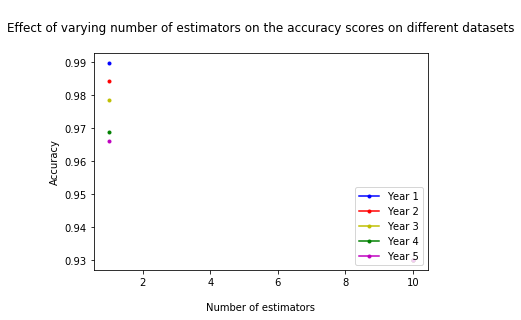

In [37]:
import matplotlib.pyplot as plt

estimators = [i+1 for i in range(1)] 

# plot year1, year2, year3, year4 and year5 accuracy values
# for range of estimator values from 1 to 30
plt.plot(estimators, year1_values, '.b-')
plt.plot(estimators, year2_values, '.r-')
plt.plot(estimators, year3_values, '.y-')
plt.plot(estimators, year4_values, '.g-')
plt.plot(estimators, year5_values, '.m-') 
plt.xlabel("\nNumber of estimators")
plt.ylabel("Accuracy")
plt.title("\nEffect of varying number of estimators on the accuracy scores on different datasets\n")

# display legend
plt.plot(10, 0.93, '.b-', label='Year 1')
plt.plot(10, 0.93, '.r-', label='Year 2')
plt.plot(10, 0.93, '.y-', label='Year 3')
plt.plot(10, 0.93, '.g-', label='Year 4')
plt.plot(10, 0.93, '.m-', label='Year 5')

plt.legend(loc='lower right')